Create a new notebook to train a baseline model (TrainBaseModel.ipynb)
Implement and train a transfer learning model, selecting a model from Keras Built-in Vision Models
Make sure you look make the learning curves.
Save the model using model.save() (see Keras Model Saving
Create a new notebook to see effect of data augmentation a baseline model (TrainBaseModelAugmentation.ipynb):
Add data augmentation.
Select at least 3 augmentations that make sense for your datasets (see Keras Image Augmentation Layers).
Visualize the data augmentation to make sure it's working as expected.
Train the same model now with data augmentation.
Save the new model.
Test if data augmentation is helping:
Create a new notebook (CompareAugmentation.ipynb)
Load the 2 models and compare the ROC curves with and without augmentation.
Train the three different transfer learning models (Train-XXXX.ipynb):
Select 2 additional models from Keras Built-in Vision Models.
Create a new notebook for the each model.
Implement and train the model.
Make sure you look make the learning curves.
Save the model using model.save (see Keras Model Saving
Copy the notebook and try a different base model.
Compare the three models:
Create a new notebook (CompareModels.ipynb)
Load the 3 models.
Make a plot comparing the 3 ROC curves of the 3 models on the validation dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
archive_path = '/content/drive/MyDrive/archive'

In [ ]:
# Model Chosen: MobileNet


# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet  # MobileNet model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

In [ ]:
import os

# Define the path to your dataset directory
dataset_dir = '/content/drive/MyDrive/archive/Train_Test_Valid/Train'  # Update with the path to your dataset

# Get the list of subdirectories (classes) in the dataset directory
classes = os.listdir(dataset_dir)

# Print the number of classes and the list of classes
num_classes = len(classes)
print(f"Number of classes: {num_classes}")
print("Classes:")
for class_name in classes:
    print(class_name)


Number of classes: 6
Classes:
blue_jellyfish
barrel_jellyfish
mauve_stinger_jellyfish
lions_mane_jellyfish
Moon_jellyfish
compass_jellyfish


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet  # MobileNet model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
import os  # Import os module for file operations


In [ ]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define constants
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20
NUM_CLASSES = 6  # Update this to match the actual number of classes in your dataset


In [ ]:
# Define paths to your dataset
archive_path = '/content/drive/MyDrive/archive'
train_dir = '/content/drive/MyDrive/archive/Train_Test_Valid/Train'
validation_dir = '/content/drive/MyDrive/archive/Train_Test_Valid/valid'
test_dir = '/content/drive/MyDrive/archive/Train_Test_Valid/test'

In [ ]:
# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 900 images belonging to 6 classes.
Found 39 images belonging to 6 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 39 images belonging to 6 classes.


In [ ]:
# Load pre-trained MobileNet model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)


17225924/17225924 [==============================] - 1s 0us/step


In [ ]:
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)


Epoch 1/20
29/29 [==============================] - 346s 12s/step - loss: 1.2192 - accuracy: 0.6244 - val_loss: 0.9858 - val_accuracy: 0.7179
Epoch 2/20
29/29 [==============================] - 61s 2s/step - loss: 0.2882 - accuracy: 0.9078 - val_loss: 1.1267 - val_accuracy: 0.6923
Epoch 3/20
29/29 [==============================] - 59s 2s/step - loss: 0.2168 - accuracy: 0.9256 - val_loss: 0.9889 - val_accuracy: 0.7179
Epoch 4/20
29/29 [==============================] - 55s 2s/step - loss: 0.1122 - accuracy: 0.9700 - val_loss: 1.1331 - val_accuracy: 0.6667
Epoch 5/20
29/29 [==============================] - 58s 2s/step - loss: 0.1016 - accuracy: 0.9711 - val_loss: 1.0810 - val_accuracy: 0.7436
Epoch 6/20
29/29 [==============================] - 58s 2s/step - loss: 0.0643 - accuracy: 0.9844 - val_loss: 1.2403 - val_accuracy: 0.7436
Epoch 7/20
29/29 [==============================] - 58s 2s/step - loss: 0.0724 - accuracy: 0.9789 - val_loss: 1.1728 - val_accuracy: 0.7179
Epoch 8/20
29/29 [

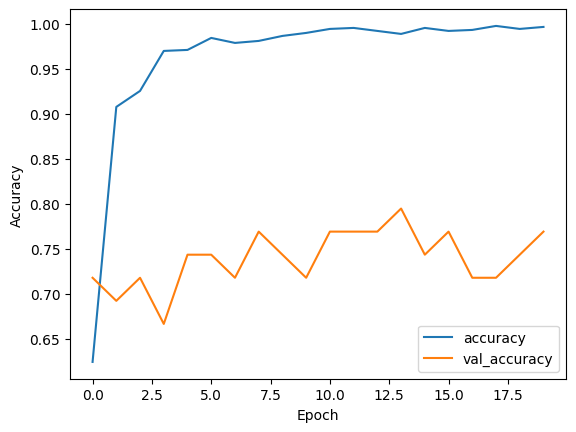

In [ ]:
# Plot learning curves
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Comments: The training accuracy of 1 indicates that the model has learned to perfectly predict the training data. This could be a sign of overfitting if the validation accuracy is considerably lower.
The validation accuracy of 0.73 suggests that the model's performance on unseen data (validation data) is not as good as its performance on the training data. This performance gap indicates that the model is not generalizing well to new data and is likely overfitting.

In [ ]:
# Define the file path where you want to save the model
model_file_path = "/content/drive/MyDrive/TrainBaseModel.h5"

# Save the model
model.save(model_file_path)

print("Model saved successfully at:", model_file_path)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully at: /content/drive/MyDrive/TrainBaseModel.h5
